In [39]:
import os
import re
import glob
import scipy
import collections

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

% matplotlib inline

from __future__ import division
init_notebook_mode(connected=True)

matplotlib.rc('axes', labelsize = 6)
matplotlib.rc('xtick', labelsize = 5) 
matplotlib.rc('ytick', labelsize = 5) 

In [40]:
class CP_Data:
    
    def __init__(self, icR, ilR):
        self.icR = int(icR)
        self.ilR = int(ilR)
        self.feats = collections.defaultdict(list)
        
    def describe(self):
        print "icR: " + repr(self.icR) + " ilR: " + repr(self.ilR) + " nRs: " + repr(self.nRs)
        
    def add_rep_feats(self, nRep, df):
        self.feats[nRep] = df.as_matrix()
    
    def get_rep_feat(self, nRep):
        return self.feats[nRep]
    
    def get_sim_params(self):
        return (self.icR, self.ilR)
    
    def get_nreps(self):
        return self.nRs

In [41]:
def extract_feats(CP_List, icR, ilR, nRep):
    for CP_Data in CP_List:
        if (icR, ilR) == CP_Data.get_sim_params():
            feat_data = np.transpose(CP_Data.get_rep_feat(nRep))
            feat_dict = {}
            for ind in range(len(feat_data)):
                feat_dict[str(feat_data[ind][0])] = feat_data[ind][1:]
            return feat_dict

In [42]:
Crocker_Full_Data_List = list()
Crocker_Full_Data_List.append(CP_Data(1,2))

df = pd.read_csv('data_icR_1_ilR_2_iR_5_CD_pos_td.csv', header=None)
Crocker_Full_Data_List[-1].add_rep_feats(5, df)

In [43]:
feat_dict = extract_feats(Crocker_Full_Data_List, 1, 2, 5)

print feat_dict.keys()
eps_vals = list(np.unique(map(float, feat_dict['epsilon'])))
dim_vals = list(np.unique(map(int, feat_dict['dimension'])))

['epsilon', 'dimension', 't', 'betticount', 'n']


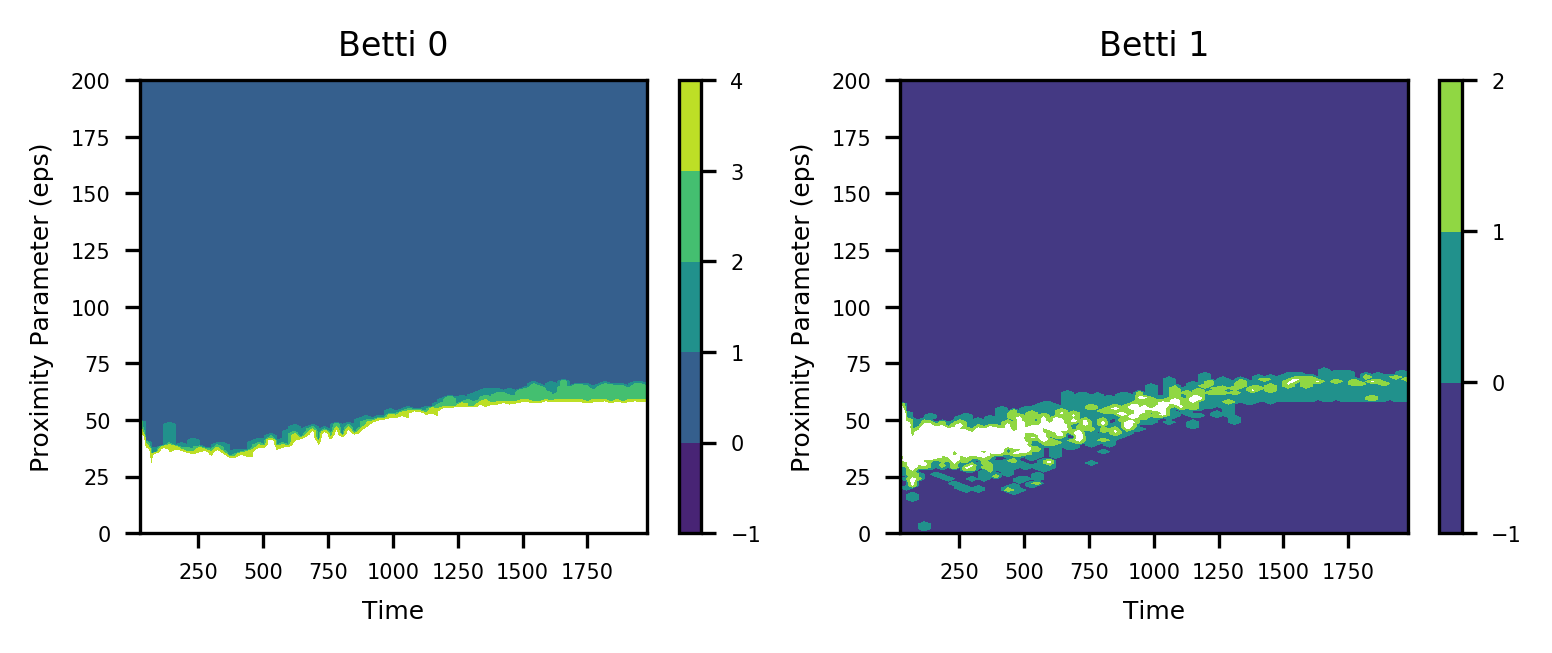

In [44]:
time_vals = np.unique(map(int, feat_dict['t']))
pers_homology = list(map(int, feat_dict['betticount']))

delta_eps = 1e-4
eps_max = int(np.max(eps_vals))
eps_min = int(np.min(eps_vals))
eps_log_vals = np.logspace(-4, 0, num = 200)
eps_log_vals = np.insert(eps_log_vals, 0, 0)

delta_t = time_vals[1] - time_vals[0]
t_max = int(np.max(time_vals))
t_min = int(np.min(time_vals))

betti_0_mat = np.zeros((len(time_vals), len(eps_vals)))
betti_1_mat = np.zeros((len(time_vals), len(eps_vals)))

def get_common_indices(listA, listB):
    res = list()
    for x in listA:
        if x in listB:
            res.append(x)
    return res

cnt = 0
for t_val in time_vals:
    
    time_idx = np.where(list(map(int, feat_dict['t'])) == t_val)[0]   
    dim_0_idx = np.where(list(map(int, feat_dict['dimension'])) == dim_vals[0])[0]
    dim_1_idx = np.where(list(map(int, feat_dict['dimension'])) == dim_vals[1])[0]
    
    idx_0 = get_common_indices(time_idx, dim_0_idx)
    idx_1 = get_common_indices(time_idx, dim_1_idx)
    
    betti_0_mat[cnt, :] = [pers_homology[idx] for idx in idx_0]
    betti_1_mat[cnt, :] = [pers_homology[idx] for idx in idx_1]
    cnt += 1
    
X, Y = np.mgrid[t_min:t_max+1:delta_t, 0:200:1]

fig, axes = plt.subplots(1, 2, figsize=(6,2), dpi=300)

#levels=[-1.0, 0.0, 1.0, 2.0]
b0_lvl = [-1, 0, 1, 2, 3, 4] #+ range(3,int(np.amax(betti_0_mat))+1, 50)
c0 = axes[0].contourf(X, Y, betti_0_mat, levels=b0_lvl)
axes[0].set_ylim([0, 200])
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Proximity Parameter (eps)')
axes[0].set_title('Betti 0', fontsize=8)
plt.colorbar(c0, ax=axes[0])

c1 = axes[1].contourf(X, Y, betti_1_mat, levels=[-1.0, 0.0, 1.0, 2.0])
axes[1].set_ylim([0, 200])
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Proximity Parameter (eps)')
axes[1].set_title('Betti 1', fontsize=8)
plt.colorbar(c1, ax=axes[1])

plt.savefig('Crocker_1,2,5_td.png')

In [39]:
np.round([eps_log_vals[25], eps_log_vals[50], eps_log_vals[75], eps_log_vals[100], eps_log_vals[125], 
          eps_log_vals[150], eps_log_vals[175], eps_log_vals[200]], 4)

array([3.000e-04, 1.000e-03, 3.100e-03, 9.800e-03, 3.110e-02, 9.880e-02,
       3.144e-01, 1.000e+00])

In [40]:
eps_log_vals

array([0.00000000e+00, 1.00000000e-04, 1.04737090e-04, 1.09698580e-04,
       1.14895100e-04, 1.20337784e-04, 1.26038293e-04, 1.32008840e-04,
       1.38262217e-04, 1.44811823e-04, 1.51671689e-04, 1.58856513e-04,
       1.66381689e-04, 1.74263339e-04, 1.82518349e-04, 1.91164408e-04,
       2.00220037e-04, 2.09704640e-04, 2.19638537e-04, 2.30043012e-04,
       2.40940356e-04, 2.52353917e-04, 2.64308149e-04, 2.76828663e-04,
       2.89942285e-04, 3.03677112e-04, 3.18062569e-04, 3.33129479e-04,
       3.48910121e-04, 3.65438307e-04, 3.82749448e-04, 4.00880633e-04,
       4.19870708e-04, 4.39760361e-04, 4.60592204e-04, 4.82410870e-04,
       5.05263107e-04, 5.29197874e-04, 5.54266452e-04, 5.80522552e-04,
       6.08022426e-04, 6.36824994e-04, 6.66991966e-04, 6.98587975e-04,
       7.31680714e-04, 7.66341087e-04, 8.02643352e-04, 8.40665289e-04,
       8.80488358e-04, 9.22197882e-04, 9.65883224e-04, 1.01163798e-03,
       1.05956018e-03, 1.10975250e-03, 1.16232247e-03, 1.21738273e-03,
      

In [41]:
Crocker_Full_Data_List = list()
Crocker_Full_Data_List.append(CP_Data(1,2))

df = pd.read_csv('data_icR_1_ilR_2_iR_5_CD_pos_td.csv', header=None)
Crocker_Full_Data_List[-1].add_rep_feats(5, df)

In [42]:
feat_dict = extract_feats(Crocker_Full_Data_List, 1, 2, 5)

print feat_dict.keys()
eps_vals = list(np.unique(map(float, feat_dict['epsilon'])))
dim_vals = list(np.unique(map(int, feat_dict['dimension'])))

['epsilon', 'dimension', 't', 'betticount', 'n']


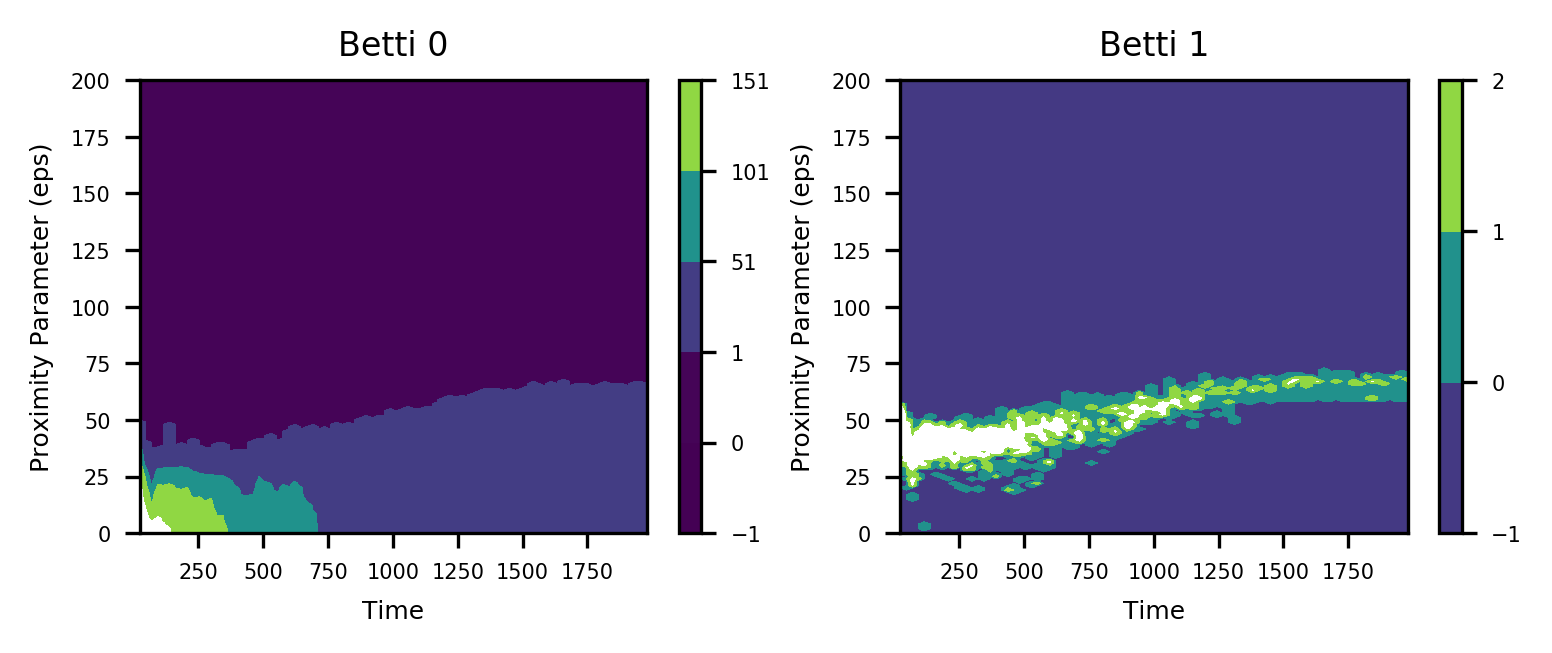

In [62]:
time_vals = np.unique(map(int, feat_dict['t']))
pers_homology = list(map(int, feat_dict['betticount']))

delta_eps = 1e-4
eps_max = int(np.max(eps_vals))
eps_min = int(np.min(eps_vals))
eps_log_vals = np.logspace(-4, 0, num = 200)
eps_log_vals = np.insert(eps_log_vals, 0, 0)

delta_t = time_vals[1] - time_vals[0]
t_max = int(np.max(time_vals))
t_min = int(np.min(time_vals))

betti_0_mat = np.zeros((len(time_vals), len(eps_vals)))
betti_1_mat = np.zeros((len(time_vals), len(eps_vals)))

def get_common_indices(listA, listB):
    res = list()
    for x in listA:
        if x in listB:
            res.append(x)
    return res

cnt = 0
for t_val in time_vals:
    
    time_idx = np.where(list(map(int, feat_dict['t'])) == t_val)[0]   
    dim_0_idx = np.where(list(map(int, feat_dict['dimension'])) == dim_vals[0])[0]
    dim_1_idx = np.where(list(map(int, feat_dict['dimension'])) == dim_vals[1])[0]
    
    idx_0 = get_common_indices(time_idx, dim_0_idx)
    idx_1 = get_common_indices(time_idx, dim_1_idx)
    
    betti_0_mat[cnt, :] = [pers_homology[idx] for idx in idx_0]
    betti_1_mat[cnt, :] = [pers_homology[idx] for idx in idx_1]
    cnt += 1
    
X, Y = np.mgrid[t_min:t_max+1:delta_t, 0:200:1]

fig, axes = plt.subplots(1, 2, figsize=(6,2), dpi=300)

b0_lvl = [-1, 0] + range(1,int(np.amax(betti_0_mat))+1, 50)
# [-1.0, 0.0, 1.0, 2.0]
c0 = axes[0].contourf(X, Y, betti_0_mat, levels=b0_lvl)
axes[0].set_ylim([0, 200])
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Proximity Parameter (eps)')
axes[0].set_title('Betti 0', fontsize=8)
plt.colorbar(c0, ax=axes[0])

c1 = axes[1].contourf(X, Y, betti_1_mat, levels=[-1.0, 0.0, 1.0, 2.0])
axes[1].set_ylim([0, 200])
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Proximity Parameter (eps)')
axes[1].set_title('Betti 1', fontsize=8)
plt.colorbar(c1, ax=axes[1])

plt.savefig('Crocker_1,2,5_td.png')

In [63]:
b0_lvl

[-1, 0, 1, 51, 101, 151]